Canevas de code python pour le DM décarbonation.
Ce document vous fournit :
    une liste des modules pythons à importer
    un modèle pour l’import de table de données formatées en .csv selon les habitudes françaises
    les paramètres permettant d’écrire les étiquettes de temps sur l’axe d’une figure avec un pas de temps mensuel sous la forme «Mois»
    un canevas de tracé de  courbes de données indexées sur le temps, avec titres et étiquettes, ainsi qu’une fonction d’export.

@author: Martin Hennebel

In [2]:
# modules utiles à importer
import math
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.dates as mdates
import locale #pour paramètre locaux de date

!sudo apt-get update -y
!sudo apt-get install -y locales
!sudo locale-gen fr_FR.UTF-8
!sudo update-locale LANG=fr_FR.UTF-8

!locale -a

locale.setlocale(locale.LC_ALL, 'fr_FR.utf8')


Hit:1 https://ppa.launchpadcontent.net/git-core/ppa/ubuntu noble InRelease
Ign:2 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble InRelease
Hit:3 http://security.ubuntu.com/ubuntu noble-security InRelease          
Err:4 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble Release 
  404  Not Found [IP: 185.125.190.80 443]
Hit:5 http://archive.ubuntu.com/ubuntu noble InRelease
Hit:6 http://archive.ubuntu.com/ubuntu noble-updates InRelease
Hit:7 http://archive.ubuntu.com/ubuntu noble-backports InRelease
Hit:8 https://apt.postgresql.org/pub/repos/apt noble-pgdg InRelease
Reading package lists... Done        
E: The repository 'https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu noble Release' does not have a Release file.
N: Updating from such a repository can't be done securely, and is therefore disabled by default.
N: See apt-secure(8) manpage for repository creation and user configuration details.
W: https://apt.postgresql.org/pub/repos/apt/dists/noble-pgdg/InRelea

'fr_FR.utf8'

In [3]:
from datetime import datetime
print(datetime.now().strftime("%A %d %B %Y"))
print(locale.format_string("%.2f", 12345.6789, grouping=True))

vendredi 07 novembre 2025
12 345,68


In [4]:
#%% liens vers les docs de fonctions pandas utiles 
"""
10 minutes d’introduction à pandas
https://pandas.pydata.org/docs/user_guide/10min.html
Un tutoriel pour débuter avec les séries temporelles dans pandas :
https://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html    
Notice pour traiter les séries temporelles avec pandas
https://pandas.pydata.org/docs/user_guide/timeseries.html

Notices des fonctions pandas permettant de traiter des tables de données «Dataframe»
https://pandas.pydata.org/docs/reference/frame.html
    
parmi ces fonctions certaines à regarder :
pandas.DataFrame.index      pour récupérer l’index des lignes
pandas.DataFrame.columns    pour récupérer les titres des colonnes    
pandas.DataFrame.dtypes     pour récupérer les types de données dans la table
pandas.DataFrame.loc        pour extraire des données localisées par leurs étiquettes
pandas.DataFrame.iloc       pour extraire des données localisées par leurs positions (nombres entiers)
pandas.DataFrame.max        pour obtenir le maximum (min pour le minimum)
pandas.DataFrame.idxmax     pour obtenir l’indice du maximum (min pour le minimum)
pandas.DataFrame.nlargest   pour obtenir les n plus grandes valeurs (nsmallest pour les plus petites)
pandas.DataFrame.to_timestamp()   pour transformer des index en format temporel
pandas.DataFrame.tz_convert()    pour convertir un index temporel d’un fuseau horaire à un autre (Continental European Time pour Paris)
pandas.DataFrame.tz_localize()    pour affecter un fuseau horaire à un index temporel naïf
pandas.to_datetime              pour convertir des arguments en date + heure (datetime)
pandas.DataFrame.sort_values    pour trier les valeurs par ordre

…
"""

'\n10 minutes d’introduction à pandas\nhttps://pandas.pydata.org/docs/user_guide/10min.html\nUn tutoriel pour débuter avec les séries temporelles dans pandas :\nhttps://pandas.pydata.org/docs/getting_started/intro_tutorials/09_timeseries.html    \nNotice pour traiter les séries temporelles avec pandas\nhttps://pandas.pydata.org/docs/user_guide/timeseries.html\n\nNotices des fonctions pandas permettant de traiter des tables de données «Dataframe»\nhttps://pandas.pydata.org/docs/reference/frame.html\n\nparmi ces fonctions certaines à regarder :\npandas.DataFrame.index      pour récupérer l’index des lignes\npandas.DataFrame.columns    pour récupérer les titres des colonnes    \npandas.DataFrame.dtypes     pour récupérer les types de données dans la table\npandas.DataFrame.loc        pour extraire des données localisées par leurs étiquettes\npandas.DataFrame.iloc       pour extraire des données localisées par leurs positions (nombres entiers)\npandas.DataFrame.max        pour obtenir le m

In [5]:
#%% Modèle d’import de données en csv formaté à la française (; en séparateur, virgule comme séparteur décimal, formatage des dates)

#donnees_importees_Pays_annee=pd.read_csv('Table_Donnees.csv',sep=';',decimal=',',index_col=[0],parse_dates=[0],date_format="ISO8601")
#%% paramètres des étiquettes temporelles pour l’axe du temps dans les figures. 
  # intervalle mensuel pour les étiquettes

#Mois=mdates.MonthLocator(bymonthday=1)# chaque mois, le premier jour du mois.

  #format affichage Mois : 
#MoisFmt = mdates.DateFormatter('%b')# nom du mois abrégé sur 4 lettres.
#Hours = mdates.HourLocator()   #

#%%Template de Tracé d’une figure
  #On crée le repère        
#fig, ax = plt.subplots()
  #tracé de la courbe conso vs temps, avec des valeurs de divisées par 1000, pour une table de données indexée sur le temps.
#ax.plot(Table_Donnees.index,(Table_Donnes['Nom_Colonne_Donnees'].values/1000), linewidth=.5)

   #affichage du titre
#plt.title('Titre de la figure')
#Limites min et max de l’axe x
#ax.set_xlim(Table_Donnees.index[0],Table_Donnees.index[-1])

#positionnement des étiquettes de temps à chaque mois
#ax.xaxis.set_major_locator(Mois)
#format des étiquettes de temps
#ax.xaxis.set_major_formatter(MoisFmt)
#légende de l'axe des abscisses
#plt.xlabel('Mois')

#Limites min max de l’axe y
#ax.set_ylim(0,100)
#légende de l'axe des ordonnées
#plt.ylabel('Valeurs (Unité)')


# affichage de la grille pour faciliter la lecture des valeurs
#plt.grid(True)
# affichage de la figure
#plt.show()
#sauvegarde de la figure en .svg :
#plt.savefig(r'Adresse\du\Repertoire\' + 'Nom_Fichier.svg')
#les enregistrement de figure doivent être fait en format vectoriel : .svg, .emf, .eps
# Éviter les enregistrements en format matriciels, lourds et flou en agrandissement : .bmp, .jpg …

## Exercice 1 Analyse de la consommation
Importer la série temporelle des consommations au pas horaire de l’année 2024 (fichier Don-
nees_France_2024.csv)

In [57]:

df = pd.read_csv("Donnees_France_2024_fr_cet.csv", sep=';') # on ajoute le séparateur car on voit en printant head que c'est ce qui est utilisé
print(df.head())

                       Index   Load  Biomass  Fossil Gas  Fossil Hard coal  \
0  2024-01-01 00:00:00+01:00  52847      343        1810              15.0   
1  2024-01-01 01:00:00+01:00  51600      343        1840              16.0   
2  2024-01-01 02:00:00+01:00  50992      343        1787              16.0   
3  2024-01-01 03:00:00+01:00  48187      343        1778              15.0   
4  2024-01-01 04:00:00+01:00  46479      343        1765              15.0   

   Fossil Oil  Hydro Pumped Storage Generation  \
0         162                              NaN   
1         191                              NaN   
2         190                              NaN   
3         190                              NaN   
4         191                              NaN   

   Hydro Pumped Storage Consumption  Hydro Run-of-river and poundage  \
0                            2033.0                             4822   
1                            2067.0                             4767   
2             

In [58]:
# question 1 : On cherche le nombre de valeurs, on va regarder le nombre de colonnes et le nombre de ligne
print(df.shape)
print(24*365)

(8784, 15)
8760


Il y a 8784 lignes pour 15 colonnes. 
Il y a donc 8784 valeurs pour chaque catégorie. 
On note qu'il y a des valeurs manquantes Nan. On peut les compter dans un second temps.

Il y a 24x365h dans une année soit : 8760. On remarque donc que c'est une année +1 jour.
Ce qui est cohérent car l'année 2024 est une année bissextile !
Il y a donc 366 jours soit 8784 heures. On retrouve le nombre de valeurs.

In [59]:
# Question 2
import pandas as pd
import locale

# Convertir la colonne Index en datetime
df['Index'] = pd.to_datetime(df['Index'], utc=True)

# Définir la locale française pour les mois en français
locale.setlocale(locale.LC_TIME, 'fr_FR.utf8')  # ou 'fr_FR' selon ton système

# Colonnes à analyser (tout sauf 'Index')
cols = df.columns.drop('Index')


summary = []

for col in cols:
    max_val = df[col].max()
    min_val = df[col].min()
    
    max_date = df.loc[df[col].idxmax(), 'Index'].strftime("%-d %B %Y")
    min_date = df.loc[df[col].idxmin(), 'Index'].strftime("%-d %B %Y")
    
    summary.append({
        'Colonne': col,
        'Valeur Max': max_val,
        'Date Max': max_date,
        'Valeur Min': min_val,
        'Date Min': min_date
    })

summary_df = pd.DataFrame(summary)

summary_df

,Colonne,Valeur Max,Date Max,Valeur Min,Date Min
0,Load,82800.0,10 janvier 2024,29575.0,12 mai 2024
1,Biomass,392.0,9 novembre 2024,301.0,11 octobre 2024
2,Fossil Gas,8953.0,28 février 2024,310.0,19 juin 2024
3,Fossil Hard coal,1087.0,12 janvier 2024,0.0,11 janvier 2024
4,Fossil Oil,1375.0,26 mars 2024,9.0,18 novembre 2024
5,Hydro Pumped Storage Generation,4876.0,27 février 2024,0.0,19 août 2024
6,Hydro Pumped Storage Consumption,3594.0,9 février 2024,0.0,27 décembre 2024
7,Hydro Run-of-river and poundage,8051.0,6 mai 2024,2197.0,21 septembre 2024
8,Hydro Water Reservoir,5212.0,10 janvier 2024,108.0,12 novembre 2024
9,Nuclear,53046.0,26 décembre 2024,20543.0,7 avril 2024


In [60]:
#question 3
mean_load = df['Load'].mean()
print("Puissance moyenne annuelle :", mean_load, "MW ?")

# Au 1er janvier 2025, la France compte 68,6 millions d’habitants dont 66,4 millions en France métropolitaine. (Insee)

pop_metro = 66400000
mean_load_per_hab = mean_load / pop_metro
print("Puissance moyenne annuelle par habitant:", mean_load_per_hab, "MW ?")

Puissance moyenne annuelle : 48916.86828324226 MW ?
Puissance moyenne annuelle par habitant: 0.0007366998235428051 MW ?


In [61]:
total_energy_MWh = df['Load'].sum()  # en MWh
print("Énergie totale annuelle :", total_energy_MWh, "MWh")
pop_metro = 66400000

energy_per_capita_MWh = total_energy_MWh / pop_metro
print("Énergie annuelle par habitant :", energy_per_capita_MWh, "MWh/personne")


Énergie totale annuelle : 429685771 MWh
Énergie annuelle par habitant : 6.47117125 MWh/personne


/tmp/ipykernel_37403/1114411841.py:28: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  unique_months = df.index.to_period("M").unique()
/tmp/ipykernel_37403/1114411841.py:29: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]


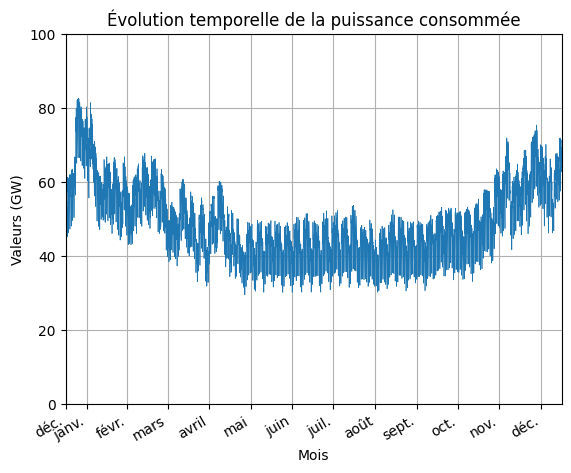

<Figure size 640x480 with 0 Axes>

In [67]:
Mois = mdates.MonthLocator(bymonthday=1)  # chaque mois, le premier jour du mois.

df = df.reset_index()
df['Index'] = pd.to_datetime(df['Index'])# remet l'index en colonne
df = df.set_index('Index')

#format affichage Mois : 
MoisFmt = mdates.DateFormatter('%b')  # nom du mois abrégé sur 4 lettres.
Hours = mdates.HourLocator()   #

#%%Template de Tracé d’une figure
  #On crée le repère        
fig, ax = plt.subplots()
  #tracé de la courbe conso vs temps, avec des valeurs de divisées par 1000, pour une table de données indexée sur le temps.
ax.plot(df.index, (df['Load'].values/1000), linewidth=.5)

   #affichage du titre
plt.title('Évolution temporelle de la puissance consommée')
#Limites min et max de l’axe x
ax.set_xlim(df.index[0], df.index[-1])

#positionnement des étiquettes de temps à chaque mois
#ax.xaxis.set_major_locator(Mois)
#format des étiquettes de temps
#ax.xaxis.set_major_formatter(MoisFmt)

#positionnement des étiquettes de temps à chaque mois
unique_months = df.index.to_period("M").unique()
month_positions = [df[df.index.to_period("M") == m].index[len(df[df.index.to_period("M") == m]) // 2] for m in unique_months]
month_labels = [m.strftime("%b") for m in unique_months]

ax.set_xticks(month_positions)
ax.set_xticklabels(month_labels)
ax.set_xticklabels(month_labels, rotation=30, ha='right')

#légende de l'axe des abscisses
plt.xlabel('Mois')

#Limites min max de l’axe y
ax.set_ylim(0, 100)
#légende de l'axe des ordonnées
plt.ylabel('Valeurs (GW)')

# affichage de la grille pour faciliter la lecture des valeurs
plt.grid(True)
# affichage de la figure
plt.show()
#sauvegarde de la figure en .svg :
plt.savefig('Puissance_Consommee_2024.svg')


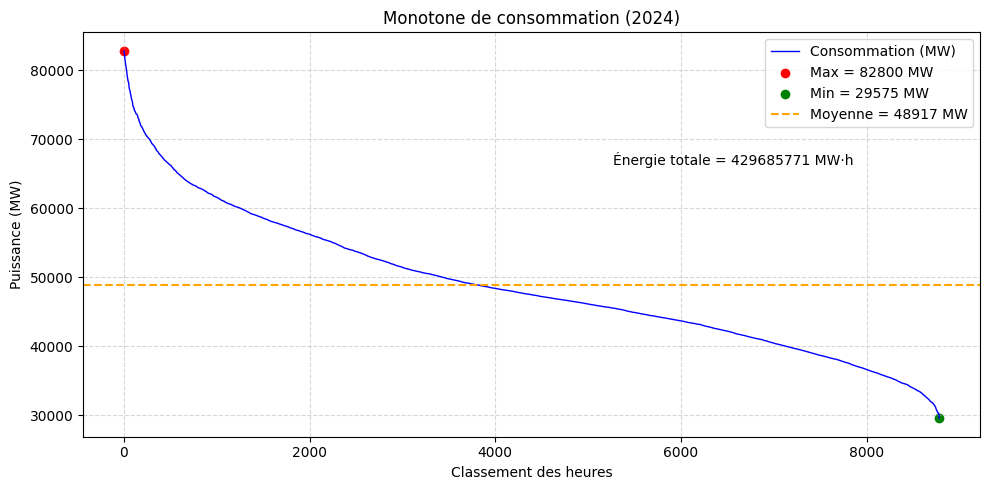

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# --- Données triées par ordre décroissant ---
sorted_load = np.sort(df['Load'].values)[::-1]  # tri décroissant

# --- Calcul des valeurs clés ---
max_load = sorted_load[0]
min_load = sorted_load[-1]
mean_load = np.mean(sorted_load)
total_energy = np.sum(sorted_load)  # somme des puissances horaires (MW) → peut être convertie en MWh ou GWh si besoin

# --- Création du graphique ---
fig, ax = plt.subplots(figsize=(10,5))

ax.plot(sorted_load, color='blue', linewidth=1, label='Consommation (MW)')

# --- Marquer les points clés ---
ax.scatter(0, max_load, color='red', label=f'Max = {max_load:.0f} MW')
ax.scatter(len(sorted_load)-1, min_load, color='green', label=f'Min = {min_load:.0f} MW')
ax.axhline(mean_load, color='orange', linestyle='--', label=f'Moyenne = {mean_load:.0f} MW')

# --- Ajouter texte pour l’énergie totale ---
ax.text(len(sorted_load)*0.6, max_load*0.8, f'Énergie totale = {total_energy:.0f} MW·h', fontsize=10)

# --- Titre et légendes ---
ax.set_title("Monotone de consommation (2024)")
ax.set_xlabel("Classement des heures")
ax.set_ylabel("Puissance (MW)")
ax.legend()
ax.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()


In [70]:

hours = 366 * 24  # 2024 est bissextile

annual_energy = df['Load'].sum()  # somme des puissances horaires en MW

# Puissance maximale consommée (MW)
max_load = df['Load'].max()

# Facteur de charge
fc = annual_energy / (max_load * hours)

print(f"Facteur de charge : {fc:.3f}")


Facteur de charge : 0.591
